In [126]:
import tensorflow as tf

In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

In [2]:
import imghdr

In [8]:
img = os.path.join(image_dir, 'train_seg', 'Abiy', 'image.jpeg')
img = cv2.imread(img)
img
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

from matplotlib import pyplot as plt

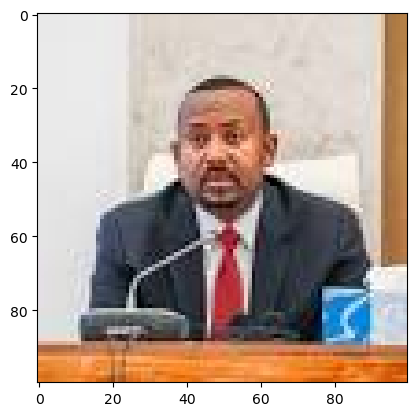

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# for image_classes in os.listdir(os.path.join(image_dir, 'train_seg')):
#     for image in os.listdir(os.path.join(image_dir, 'train_seg', image_classes)):
#         image_path = os.path.join(image_dir, 'train_seg', image_class, image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print("invalid image")
#                 os.remove(image_path)
#         except:
#             try:
#                 os.remove(image_path)
#             except:
#                 print("error")

In [11]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'Abiy': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'Obama':
            label = 1
        elif labels == 'Putin':
            label = 2
        image_folder = os.path.join(directory , labels)
        for image_file in os.listdir(image_folder): #Extracting the file name of the image from Class Label folder
            path = os.path.join(image_folder , image_file)
            image = cv2.imread(path) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'Abiy', 1:'Obama', 2:'Putin'}
    return labels[class_code]

In [12]:
image_dir = 'image_dir'

In [13]:
directory = os.path.join(image_dir, 'train_seg')
for labels in os.listdir(directory):
    print(labels)

Abiy
Obama
Putin


In [14]:

# load training image 
Images, Labels = get_images(os.path.join(image_dir, 'train_seg')) #Extract the training images from the folders.

Images = np.array(Images)/255 #converting the list of images to numpy array and also normalize the the imafe
Labels = np.array(Labels)

In [ ]:
Images

Lets find shape of our traing data.

As you see, The Training data is in shape of (Number of Training Images, Width of image, Height of image, Channel of image). This shape is very important. If you didnot resize the images to same size. It should be (No. of images,) shape. So, using this shape you cant feed the images to the model.

In [239]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (545, 150, 150, 3)
Shape of Labels: (545,)


Let us look some random images of our dataset.

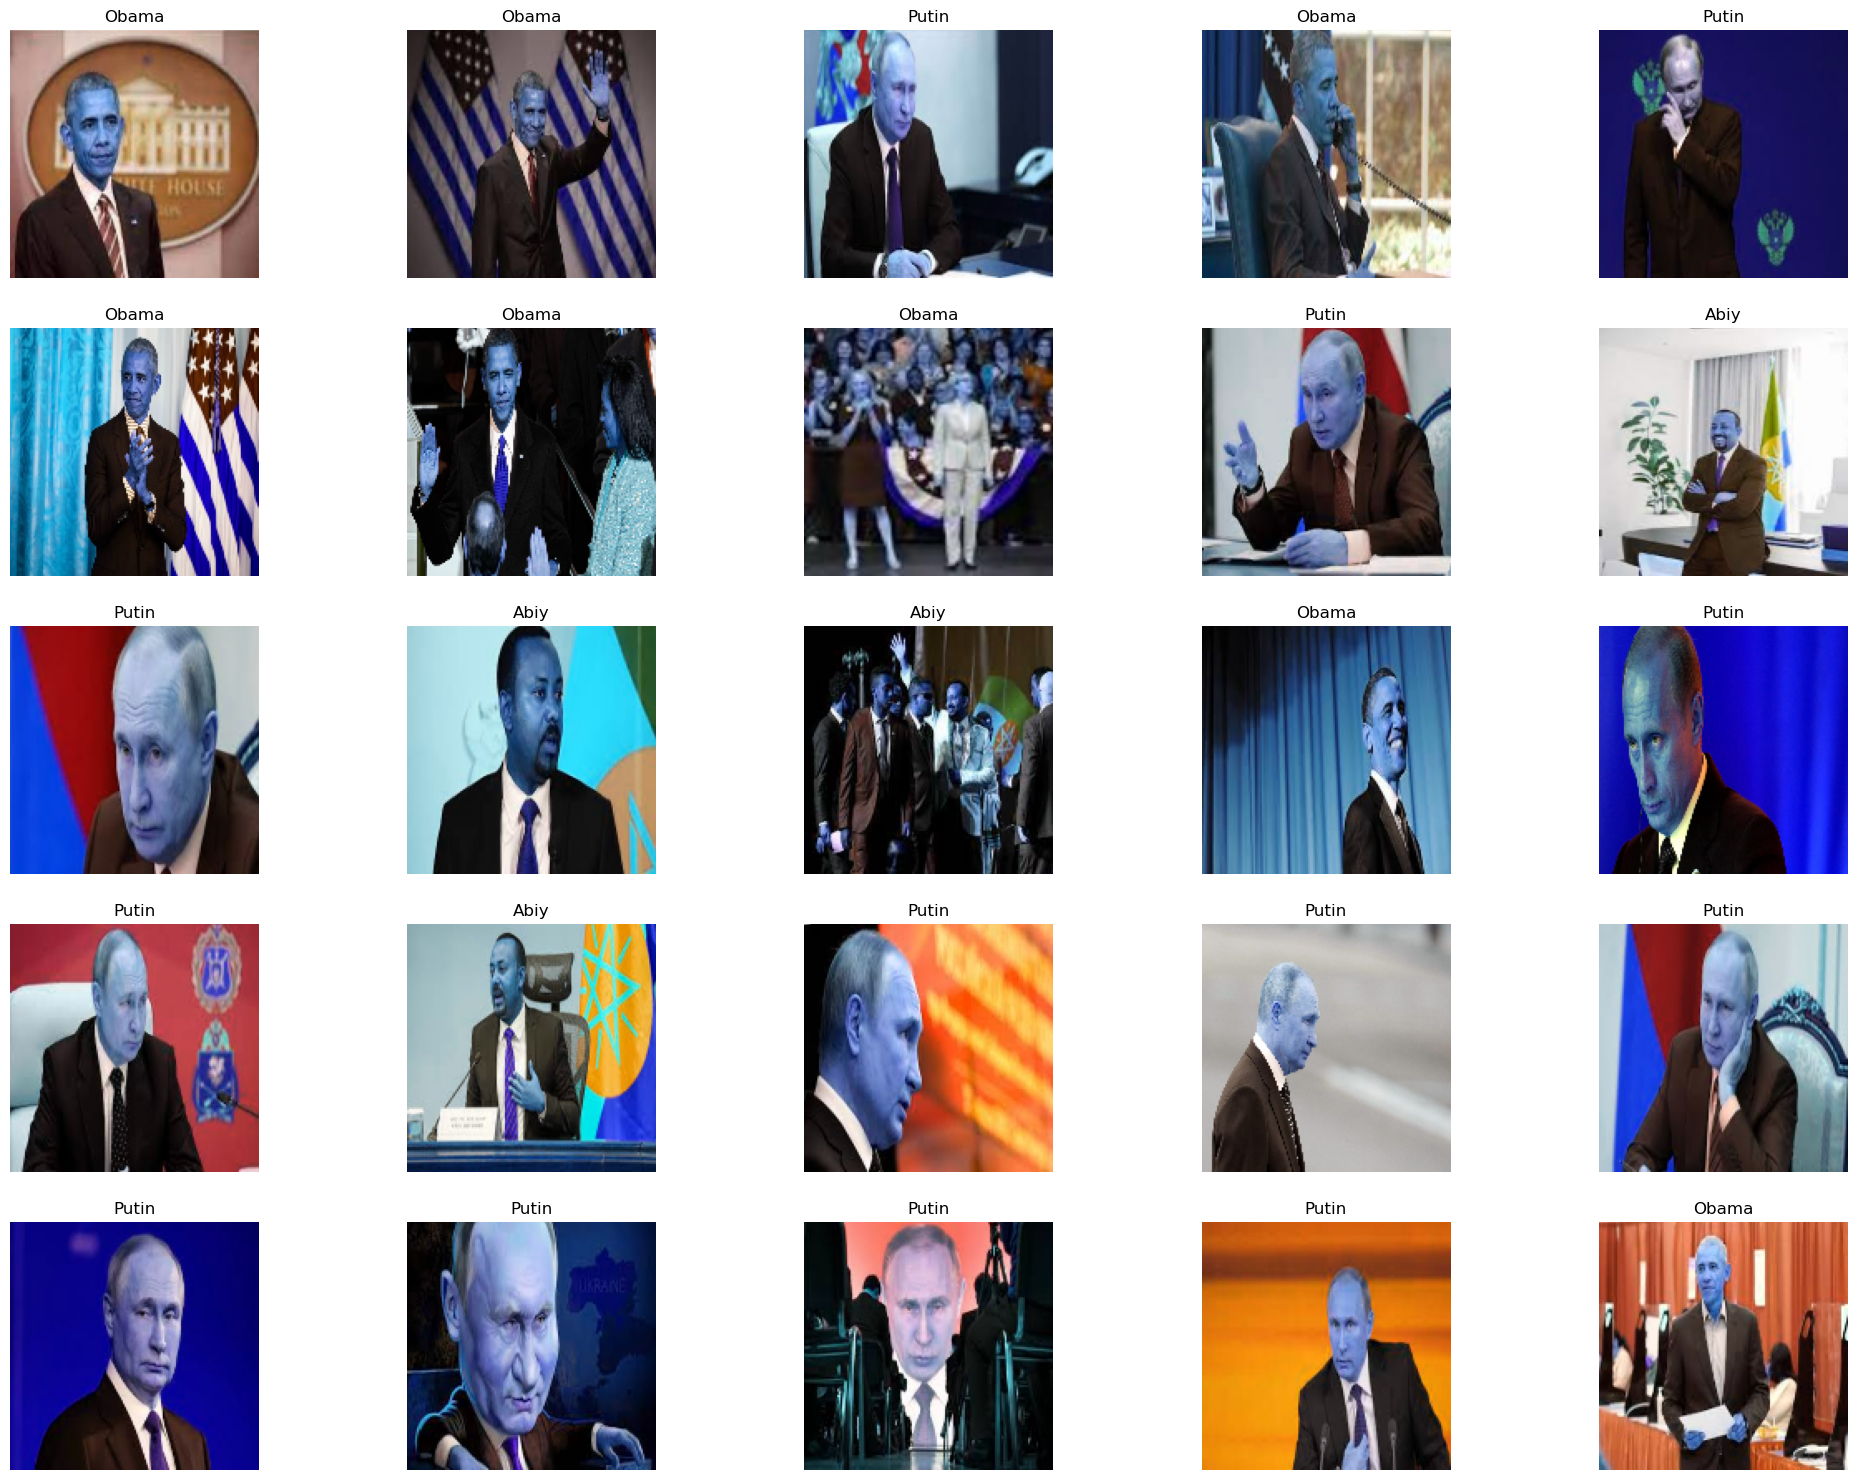

In [16]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Now, Create the CNN model to predict the class labels.This is the basic CNN model.

In [32]:
# 200, 180, 180, 140, 140, 100, 50, 180, 100, 50

model = Models.Sequential()

model.add(Layers.Conv2D(243,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(243,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(81,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(81,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(27,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(27,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Flatten())
model.add(Layers.Dense(81,activation='relu'))
model.add(Layers.Dense(27,activation='relu'))
model.add(Layers.Dense(27,activation='relu'))
model.add(Layers.Dropout(rate=0.2))
model.add(Layers.Dense(3,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 243)     6804      
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 243)     531684    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 243)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 81)        177228    
                                                                 
 conv2d_7 (Conv2D)           (None, 69, 69, 81)        59130     
                                                                 
 conv2d_8 (Conv2D)           (None, 67, 67, 27)        19710     
                                                      

Now, lets train the model with validation split equal to 30% from training data. Validation split is used to determine that our model is not geting over-fitted.

In [33]:
trained = model.fit(Images,Labels,epochs=30,validation_split=0.2)

Epoch 1/10
14/14 [==============================] - 206s 15s/step - loss: 1.0978 - accuracy: 0.3578 - val_loss: 1.0970 - val_accuracy: 0.3394
Epoch 2/10
14/14 [==============================] - 203s 15s/step - loss: 1.0955 - accuracy: 0.3624 - val_loss: 1.0895 - val_accuracy: 0.3761
Epoch 3/10
14/14 [==============================] - 204s 15s/step - loss: 1.0795 - accuracy: 0.4037 - val_loss: 1.0887 - val_accuracy: 0.3486
Epoch 4/10
14/14 [==============================] - 201s 14s/step - loss: 1.0746 - accuracy: 0.3899 - val_loss: 1.0442 - val_accuracy: 0.4954
Epoch 5/10
14/14 [==============================] - 202s 15s/step - loss: 1.0800 - accuracy: 0.3968 - val_loss: 1.0179 - val_accuracy: 0.4404
Epoch 6/10
14/14 [==============================] - 198s 14s/step - loss: 1.0602 - accuracy: 0.4060 - val_loss: 1.0809 - val_accuracy: 0.3853
Epoch 7/10
14/14 [==============================] - 303s 22s/step - loss: 1.0436 - accuracy: 0.4197 - val_loss: 1.0646 - val_accuracy: 0.4220
Epoch 

In [34]:
3*3*3*3*3

243

In [35]:
trained.history

{'loss': [1.0977590084075928,
  1.095518708229065,
  1.0795114040374756,
  1.0745774507522583,
  1.0800424814224243,
  1.060240387916565,
  1.0435822010040283,
  0.9840742349624634,
  0.9621092677116394,
  0.8337582945823669],
 'accuracy': [0.35779815912246704,
  0.3623853325843811,
  0.40366971492767334,
  0.3899082541465759,
  0.39678898453712463,
  0.40596330165863037,
  0.4197247624397278,
  0.46330276131629944,
  0.53899085521698,
  0.6215596199035645],
 'val_loss': [1.0969911813735962,
  1.0894629955291748,
  1.0887385606765747,
  1.044153094291687,
  1.0178567171096802,
  1.0808937549591064,
  1.0645846128463745,
  1.059393048286438,
  1.044890284538269,
  1.1241041421890259],
 'val_accuracy': [0.33944955468177795,
  0.3761467933654785,
  0.3486238420009613,
  0.4954128563404083,
  0.4403669834136963,
  0.38532111048698425,
  0.4220183491706848,
  0.5229358077049255,
  0.5412843823432922,
  0.5321100950241089]}

In [114]:
model.save('recongnize.h5')

In [115]:
history = trained.history

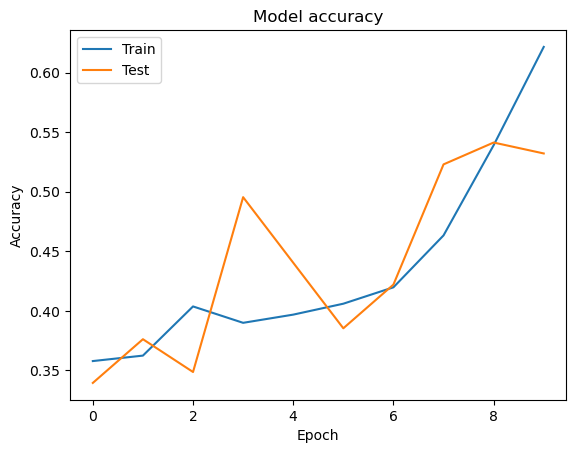

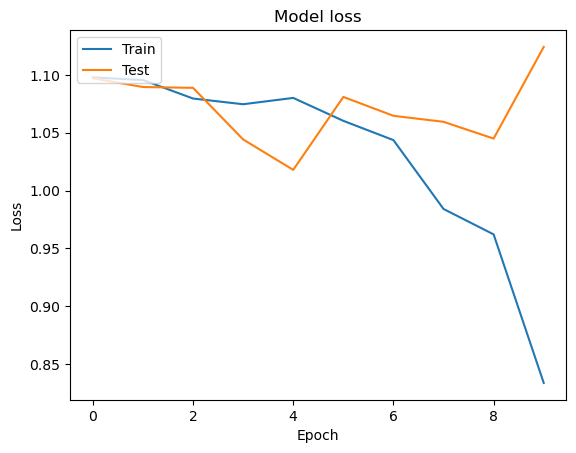

In [116]:
plot.plot(history['accuracy'])
plot.plot(history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history['loss'])
plot.plot(history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [117]:
test_images, test_Labels = get_images(os.path.join(image_dir, 'test_seg')) #Extract the training images from the folders.
test_images = np.array(test_images)/255 #converting the list of images to numpy array and also normalize the the imafe
test_Labels = np.array(test_Labels)

In [118]:
directory = os.path.join(image_dir, 'test_seg')

In [119]:
pred_images,no_labels = get_images(directory)
pred_images = np.array(pred_images)/255
pred_images.shape
pred_images.max()


1.0

In [120]:
test_images,test_labels = get_images(directory)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3/3 [==============================] - 7s 2s/step - loss: 104.7970 - accuracy: 0.5278


[104.79696655273438, 0.5277777910232544]

In [121]:
def pridict(image):    
    yhat = model.predict(np.expand_dims(image/255, 0))
    idx = 0
    cur = 0
    tot = 0
    for ci, i in enumerate(yhat[0]):
        if i > cur:
            idx = ci
            cur = i
        tot += i
    return get_classlabel(idx), cur/tot * 100, yhat

1/1 [==============================] - 0s 146ms/step


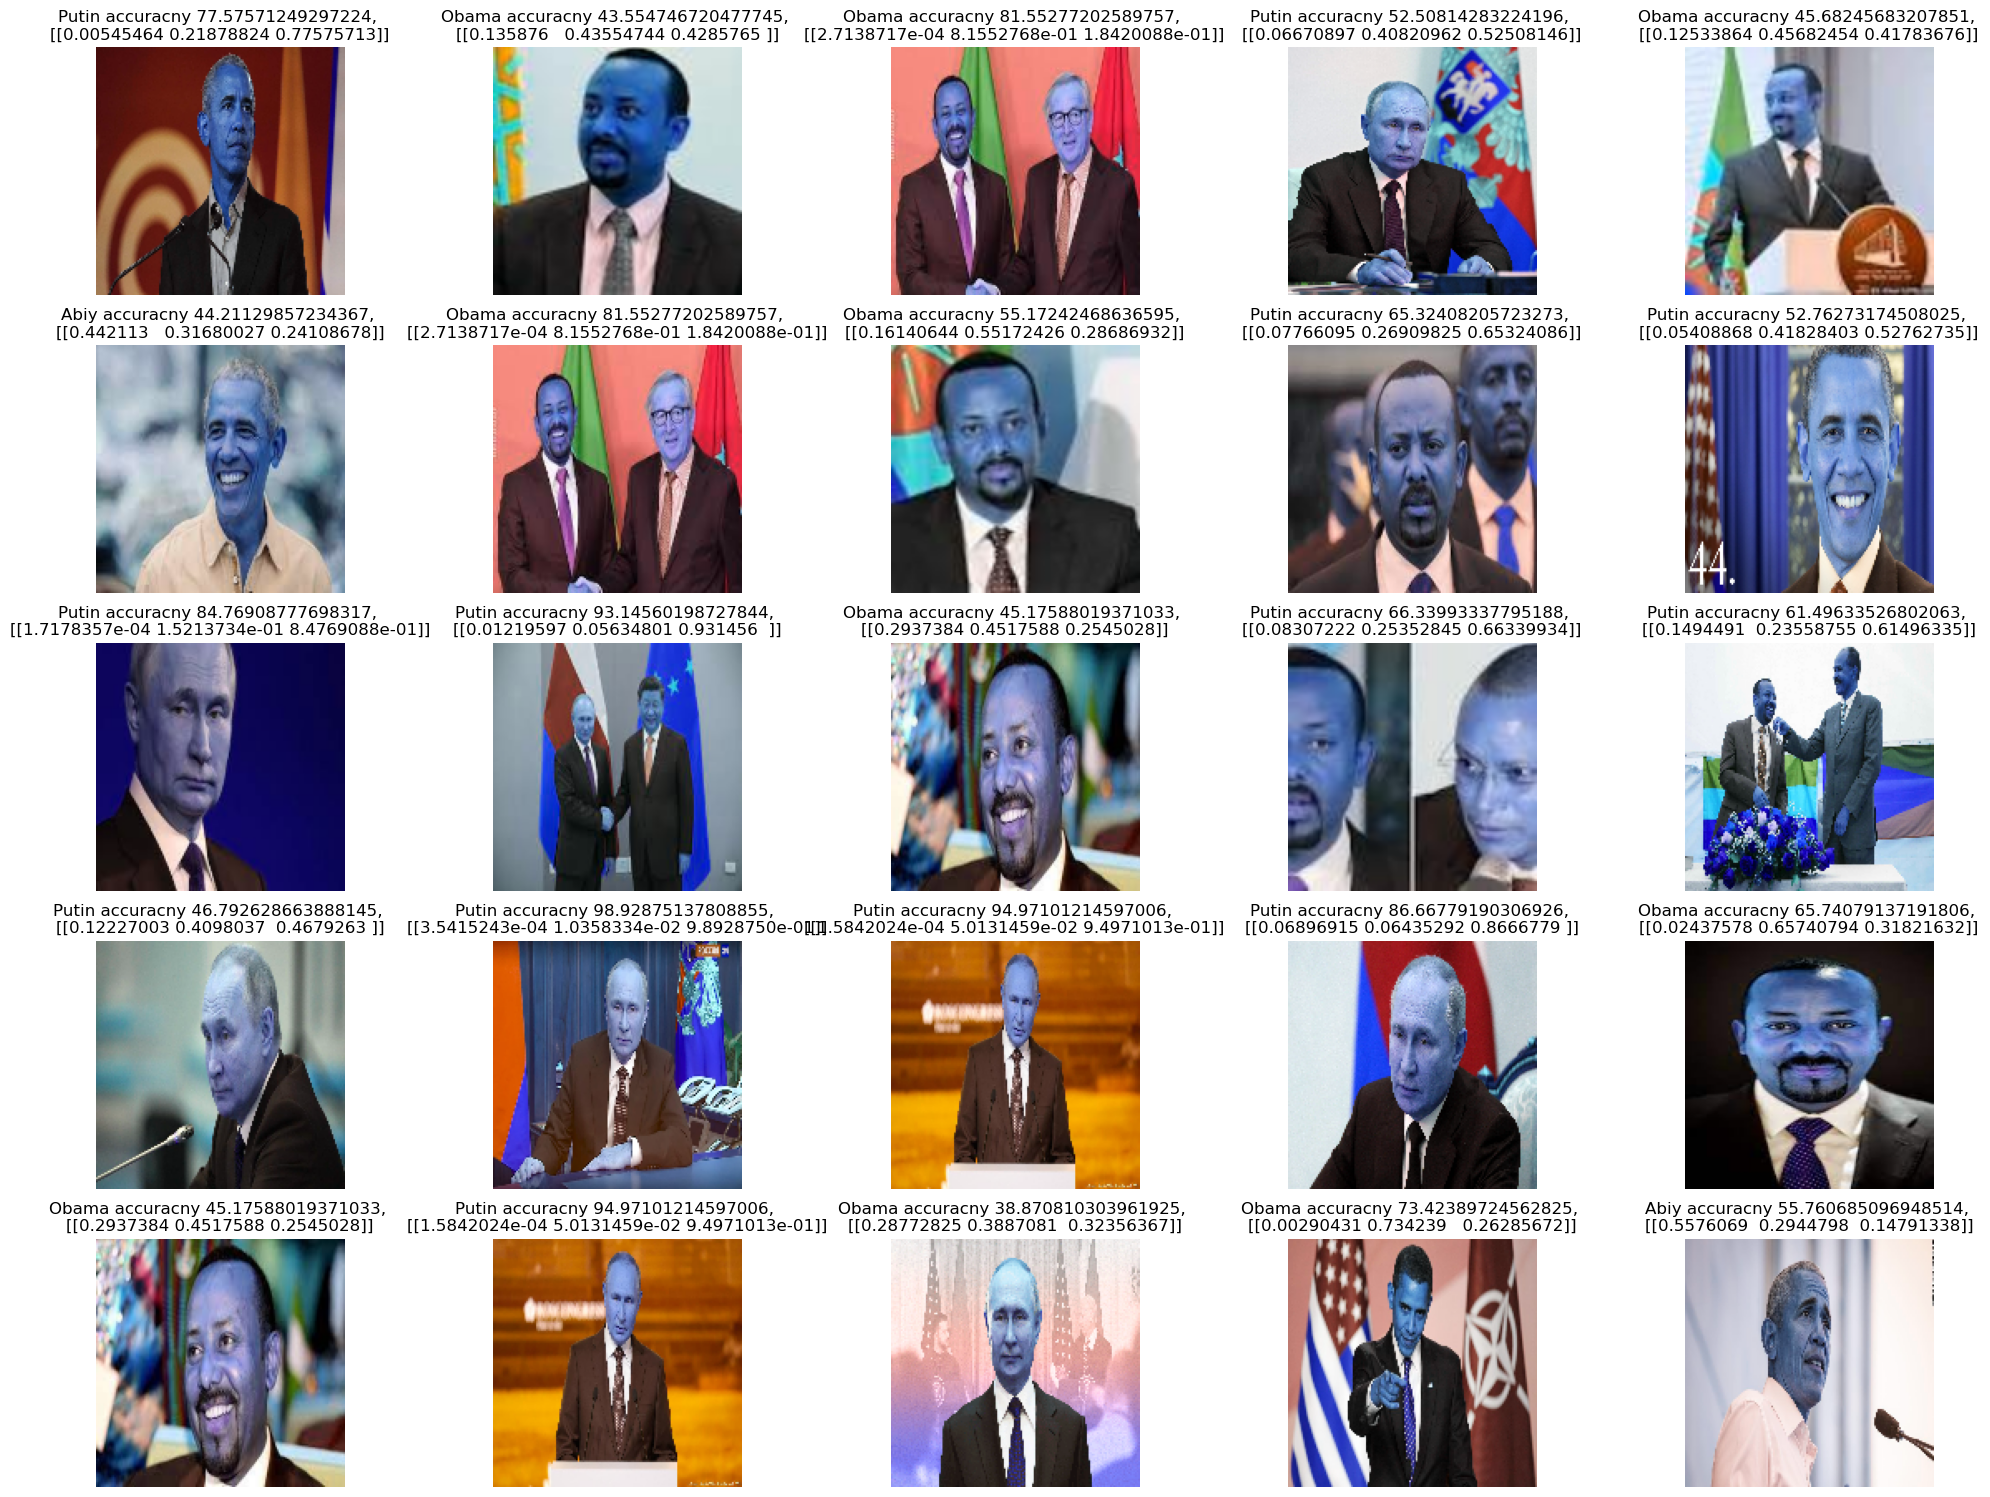

In [122]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(test_images))
        lebel, accur, ht = pridict(test_images[rnd_number])
        ax[i,j].imshow(test_images[rnd_number])
        ax[i,j].set_title('{} accuracny {}, \n{}'.format(lebel, accur, ht))
        ax[i,j].axis('off')

To evaluate a model, there are many methods are proposed to evaluate the model. I use Accuracy to evaluate the performance of my model.

In [161]:
import time

Lets predict the images from the "pred" folder.

Following image shows the predicted class label on top of the image and probabilities below of the image.

1/1 [==============================] - 0s 141ms/step


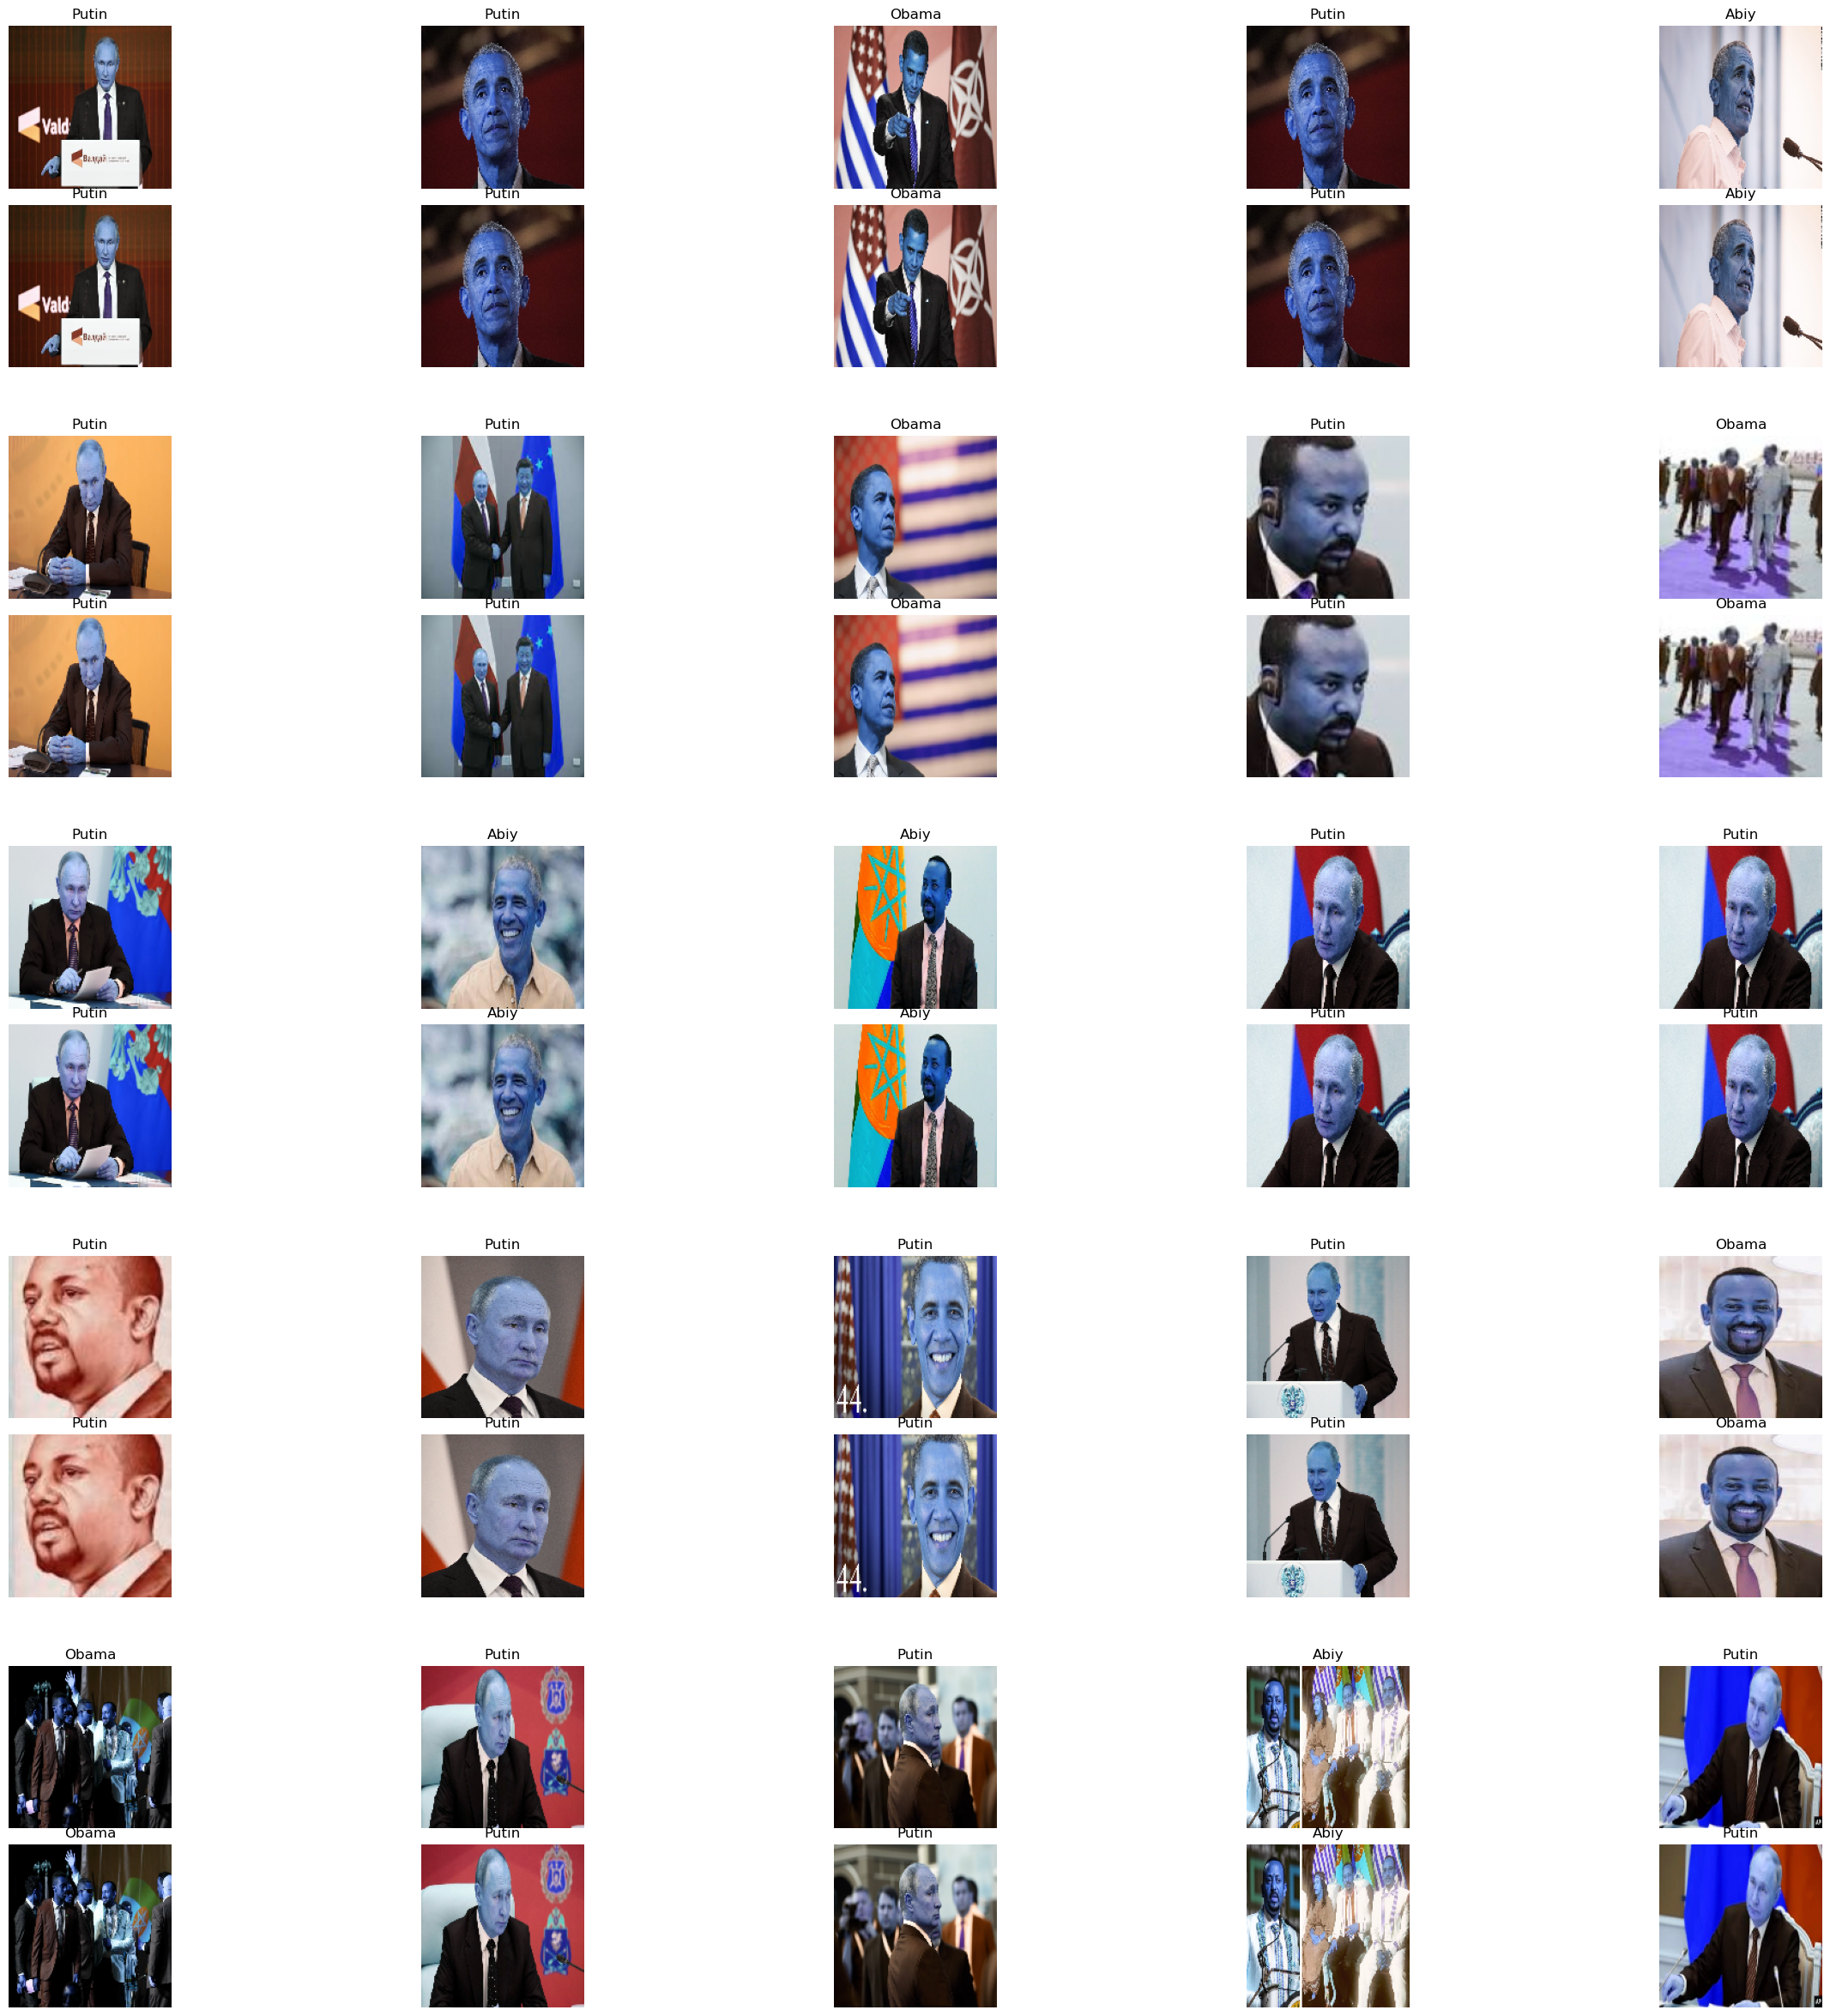

In [123]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_prob = model.predict(pred_image).reshape(3)
    pred_class = get_classlabel(np.argmax(pred_prob,axis=0))
    for j in range(2):
        ax = plot.Subplot(fig, inner[j])
        ax.imshow(pred_image[0])
        ax.set_title(pred_class)
        fig.add_subplot(ax)
        ax.axis('off')
fig.show()

In [160]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    resized = cv2.resize(frame,(150,150))
    pred_prob = model.predict(np.expand_dims(resized/255,0)).reshape(3)
    pred_image = np.array([resized])
    pred_class = get_classlabel(np.argmax(pred_prob,axis=0))
    
    print(pred_class)
    
    
    
    cv2.rectangle(frame, 
                      tuple(np.multiply([0.2, 0.2], [0.7,.7]).astype(int)),
                      tuple(np.multiply([0, 0], [450,450]).astype(int)), 
                            (255,0,0), 2)
    
    cv2.putText(frame, pred_class, tuple(np.add(np.multiply([0.3, 0.3], [1,1]).astype(int), [0,-3])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    time.sleep(2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 132ms/step
Putin


AttributeError: module 'cv2' has no attribute 'sleep'